## Телевидение, шоу в перерывах и Большая игра
<p>Любите вы футбол или нет, Суперкубок - это зрелище. На вашей вечеринке по случаю Суперкубка найдется что-нибудь для каждого. Драма в виде поражений, ответных ударов и споров для спортивного болельщика. Есть смехотворно дорогие рекламные ролики, некоторые веселые, другие выворачивающие наизнанку, заставляющие задуматься и странные. В перерывах между выступлениями выступают крупнейшие музыканты мира, иногда <a href="https://youtu.be/ZD1QrIe--_Y?t=14">катающиеся на гигантских механических тиграх</a> или <a href="https://youtu.be/mjrdywp5nyE?t=62">прыгающие с крыши стадиона</a>. Это шоу, детка. И в этом блокноте мы собираемся выяснить, как некоторые элементы этого шоу взаимодействуют друг с другом. После небольшого изучения и очистки наших данных мы собираемся ответить на такие вопросы, как:</p>
<ul>
<li>Штаты с наибольшим количеством Суперкубков?</li>
<li>Топ-5 команд-победительниц в истории Суперкубка?</li>
<li>Распределение призовых баллов</li>
<li>Посещаемость по годам</li>
<li>Средняя аудитория по штатам</li>
<li>#Средняя аудитория по сетям</li>
</ul>

<p>Набор данных, который мы будем использовать, был <a href="https://en.wikipedia.org/wiki/Web_scraping">извлечен</a> и отполирован из Википедии. Он состоит из трех CSV-файлов, один с <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions">игровыми данными</a>, один с <a href="https://en.wikipedia.org/wiki/Super_Bowl_television_ratings">телевизионными данными</a> и один с <a href="https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows ">данные о музыкантах в перерыве</a> для всех 52 Суперкубков до 2018 года. Давайте посмотрим, используя <code>display()</code> вместо <code>print()</code>, поскольку его вывод намного красивее в записных книжках Jupyter.</p>

### 1. Импорт данных и отображение первых строк

Описание задачи:
У вас есть несколько файлов CSV с данными о Супербоуле, телевизионных трансляциях и артистах полувременного шоу. Ваша задача - импортировать эти данные в виде DataFrame с помощью библиотеки pandas и отобразить первые пять строк каждого DataFrame.

#### Инструкции

Импортируйте библиотеку pandas с псевдонимом pd.
Используйте функцию pd.read_csv() для загрузки данных из каждого файла CSV в соответствующий DataFrame (super_bowls, tv, halftime_musicians).
Отобразите первые пять строк каждого DataFrame с помощью функции display().

In [1]:
# Импортировать 
import pandas as pd
import numpy as np


# Загрузить данные CSV в DataFrames
tv = pd.read_csv("datasets/tv.csv")
music = pd.read_csv("datasets/halftime_musicians.csv")
super_bowls = pd.read_csv("datasets/super_bowls.csv")

# Отобразить первые пять строк каждого DataFrame
print(super_bowls.head())
print(tv.head())
print(music.head())

         date  super_bowl                          venue             city  \
0  2018-02-04          52              U.S. Bank Stadium      Minneapolis   
1  2017-02-05          51                    NRG Stadium          Houston   
2  2016-02-07          50                 Levi's Stadium      Santa Clara   
3  2015-02-01          49  University of Phoenix Stadium         Glendale   
4  2014-02-02          48                MetLife Stadium  East Rutherford   

        state  attendance           team_winner  winning_pts     qb_winner_1  \
0   Minnesota       67612   Philadelphia Eagles           41      Nick Foles   
1       Texas       70807  New England Patriots           34       Tom Brady   
2  California       71088        Denver Broncos           24  Peyton Manning   
3     Arizona       70288  New England Patriots           28       Tom Brady   
4  New Jersey       82529      Seattle Seahawks           43  Russell Wilson   

  qb_winner_2    coach_winner            team_loser  los

In [2]:
# Определить столбцы с пропущенными значениями
print("Столбцы с пропущенными значениями: ", super_bowls.columns[super_bowls.isnull().any()].tolist())

# Подсчитайте общее количество пропущенных значений в каждом столбце.
print('\nОбщее количество пропущенных значений в каждом столбце:\n',super_bowls.isnull().sum())



Столбцы с пропущенными значениями:  ['qb_winner_2', 'qb_loser_2']

Общее количество пропущенных значений в каждом столбце:
 date               0
super_bowl         0
venue              0
city               0
state              0
attendance         0
team_winner        0
winning_pts        0
qb_winner_1        0
qb_winner_2       50
coach_winner       0
team_loser         0
losing_pts         0
qb_loser_1         0
qb_loser_2        49
coach_loser        0
combined_pts       0
difference_pts     0
dtype: int64


In [3]:
# Сгруппируйте фрейм данных по столбцу "состояние" и подсчитайте количество вхождений
state_counts = super_bowls.groupby('state').size()

# Отсортируйте состояния на основе количества в порядке убывания
state_counts_sorted = state_counts.sort_values(ascending=False)


# Извлеките состояние (состояния) с наибольшим количеством
most_common_states = state_counts_sorted.head()

print("Штаты с наибольшим количеством Суперкубков:\n", most_common_states)


Штаты с наибольшим количеством Суперкубков:
 state
Florida       15
California    12
Louisiana     10
Texas          4
Arizona        3
dtype: int64


In [4]:
# Сгруппируйте фрейм данных по столбцу "team_winner" и подсчитайте количество вхождений
t_w = super_bowls.groupby('team_winner').size()

# Отсортируйте команды по количеству очков в порядке убывания
t_w_sorted = t_w.sort_values(ascending=False)

# Найдите 5 лучших команд-победительниц
most_t_w = t_w_sorted.head()

print('Топ-5 команд-победительниц в истории Суперкубка:\n', most_t_w)

Топ-5 команд-победительниц в истории Суперкубка:
 team_winner
Pittsburgh Steelers     6
Dallas Cowboys          5
San Francisco 49ers     5
New England Patriots    5
Green Bay Packers       4
dtype: int64


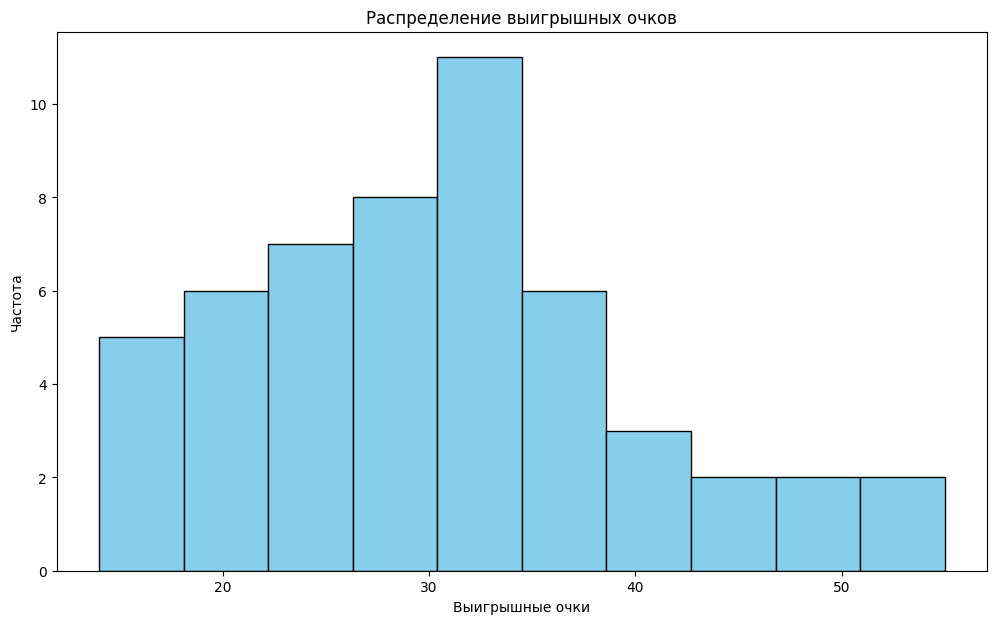

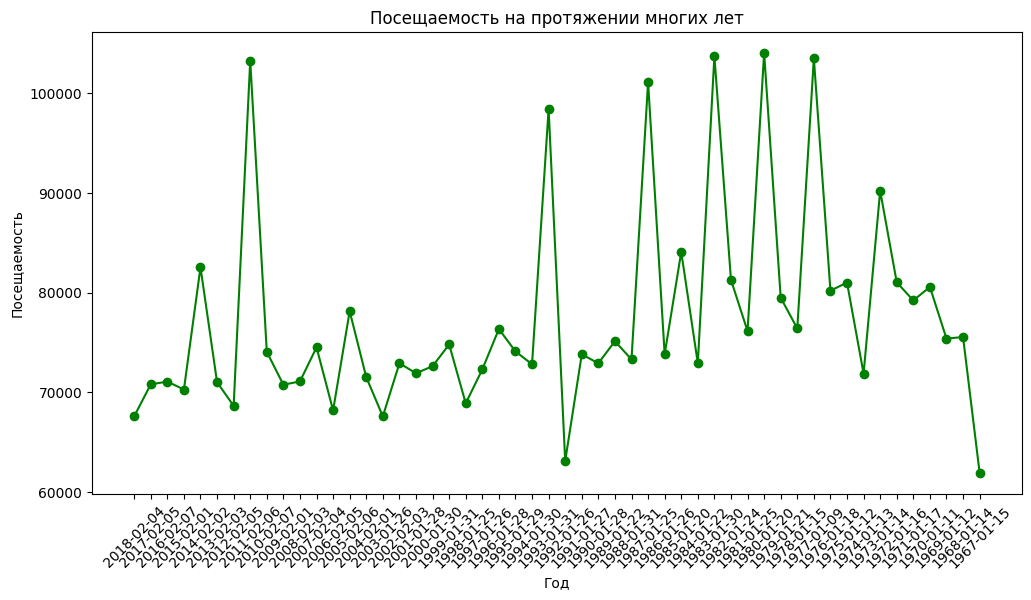

In [20]:
import matplotlib.pyplot as plt

# Распределение выигрышных очков
plt.figure(figsize=(12, 7))
plt.hist(super_bowls['winning_pts'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение выигрышных очков')
plt.xlabel('Выигрышные очки')
plt.ylabel('Частота')
plt.show()

# Посещаемость на протяжении многих лет
plt.figure(figsize=(12, 6))
plt.plot(super_bowls['date'], super_bowls['attendance'], marker='o', color='green')
plt.title('Посещаемость на протяжении многих лет')
plt.xlabel('Год')
plt.ylabel('Посещаемость')
plt.xticks(rotation=45)
plt.show()

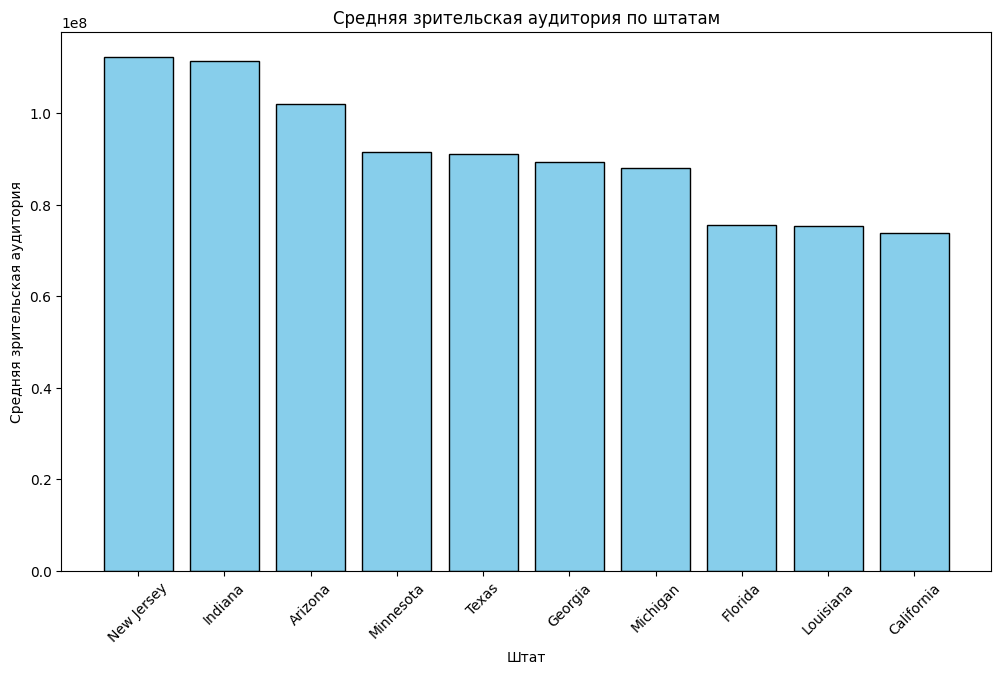

In [13]:
# # Предположим, что у вас есть фреймы данных "super_bowl" и "tv"
# Объедините фреймы данных на основе столбца "super_bowl"
merged = pd.merge(super_bowls, tv, how='inner', on='super_bowl')

# Сгруппируйте по "штату" и рассчитайте среднюю зрительскую аудиторию
grouped = merged.groupby('state')['avg_us_viewers'].mean().sort_values(ascending=False).reset_index()

# Рассчитайте среднюю зрительскую аудиторию в разных штатах.
plt.figure(figsize=(12, 7))
plt.bar(grouped['state'], grouped['avg_us_viewers'], color='skyblue', edgecolor='black')
plt.title('Средняя зрительская аудитория по штатам')
plt.xlabel('Штат')
plt.ylabel('Средняя зрительская аудитория')
plt.xticks(rotation=45)
plt.show()

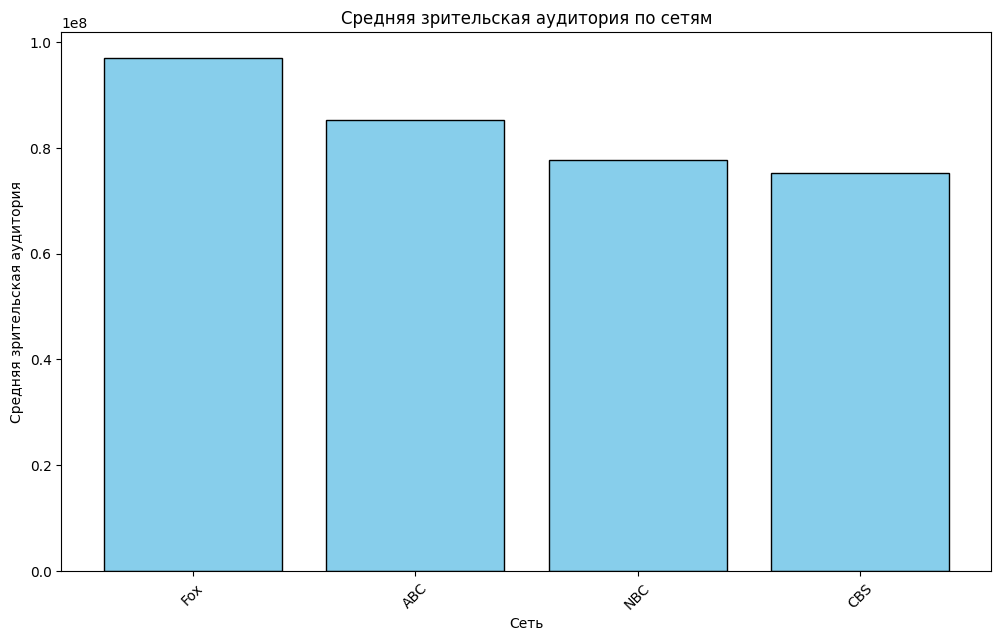

In [12]:
# # Предположим, что у вас есть фреймы данных "super_bowls" и "tv"
# Объедините фреймы данных на основе столбца "super_bowl"
merged = pd.merge(super_bowls, tv, how='inner', on='super_bowl')

# Сгруппируйте по "сети" и рассчитайте среднюю зрительскую аудиторию
grouped_network = merged.groupby('network')['avg_us_viewers'].mean().sort_values(ascending=False).reset_index()

# Рассчитайте среднюю зрительскую аудиторию для каждой сети.
plt.figure(figsize=(12, 7))
plt.bar(grouped_network['network'], grouped_network['avg_us_viewers'], color='skyblue', edgecolor='black')
plt.title('Средняя зрительская аудитория по сетям')
plt.xlabel('Сеть')
plt.ylabel('Средняя зрительская аудитория')
plt.xticks(rotation=45)
plt.show()